In [1]:
import pandas as pd
import glob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import string
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import cohen_kappa_score

In [2]:
df = pd.read_csv("E://P 58//EDA//camera_EDA.csv",encoding='utf-8').astype(str)

In [3]:
df.head(10)

,Unnamed: 0,reviews,ratings
0,0,ok dslr giant canon launched entry level dslr ...,2.0
1,1,good camera beginner,5.0
2,2,great camera perfect product young budding pho...,5.0
3,3,really impressed amazon surprise delivering wi...,5.0
4,4,buy product canon local service center help ev...,1.0
5,5,request replacement camera main body lot black...,1.0
6,6,received product dslr cannon october adopter g...,2.0
7,7,auto focus perfectminimum aperture dont expect...,3.0
8,8,want upgrade camera point shoot dslr good came...,4.0
9,9,really fully content product reached within tw...,5.0


In [4]:
df.head(5)

,Unnamed: 0,reviews,ratings
0,0,ok dslr giant canon launched entry level dslr ...,2.0
1,1,good camera beginner,5.0
2,2,great camera perfect product young budding pho...,5.0
3,3,really impressed amazon surprise delivering wi...,5.0
4,4,buy product canon local service center help ev...,1.0


In [5]:
def NaiveBaiyes_Sentimental(sentence):
    blob = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
    NaiveBayes_SentimentScore=blob.sentiment.classification
    return NaiveBayes_SentimentScore

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [8]:
a = 'This was a good movie.'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [35]:
df["reviews"].astype(str)

0       ok dslr giant canon launched entry level dslr ...
1                                    good camera beginner
2       great camera perfect product young budding pho...
3       really impressed amazon surprise delivering wi...
4       buy product canon local service center help ev...
                              ...                        
2975                                   easy carry  handle
2976    fine good product canon requires training clas...
2977                   camera taking picture good quality
2978              good beginerssuper picture quality like
2979    like image produced night good lacking camera ...
Name: reviews, Length: 2980, dtype: object

In [11]:
# VADER sentiment analysis tool for getting Compound score.
def sentimental(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    return score

# VADER sentiment analysis tool for getting pos, neg and neu.
def sentimental_Score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score > 0:
        return 'pos'
    else:
        return 'neg'

In [14]:
df['senti']=df['reviews'].apply(lambda x: sentimental_Score(x))

In [15]:
df.head(10)

,Unnamed: 0,reviews,ratings,Sentiment,senti
0,0,ok dslr giant canon launched entry level dslr ...,2.0,0.8803,pos
1,1,good camera beginner,5.0,0.4404,pos
2,2,great camera perfect product young budding pho...,5.0,0.8934,pos
3,3,really impressed amazon surprise delivering wi...,5.0,0.9801,pos
4,4,buy product canon local service center help ev...,1.0,0.4215,pos
5,5,request replacement camera main body lot black...,1.0,0.3182,pos
6,6,received product dslr cannon october adopter g...,2.0,-0.3612,neg
7,7,auto focus perfectminimum aperture dont expect...,3.0,-0.1280,neg
8,8,want upgrade camera point shoot dslr good came...,4.0,-0.6124,neg
9,9,really fully content product reached within tw...,5.0,-0.4863,neg


In [16]:
print(df.isnull().sum())

Unnamed: 0    0
reviews       0
ratings       0
Sentiment     0
senti         0
dtype: int64


In [17]:
senti = df.drop(df.columns[[0]], axis=1)

In [18]:
senti.head()

,reviews,ratings,Sentiment,senti
0,ok dslr giant canon launched entry level dslr ...,2.0,0.8803,pos
1,good camera beginner,5.0,0.4404,pos
2,great camera perfect product young budding pho...,5.0,0.8934,pos
3,really impressed amazon surprise delivering wi...,5.0,0.9801,pos
4,buy product canon local service center help ev...,1.0,0.4215,pos


In [19]:
senti['senti'].value_counts()

pos    2478
neg     502
Name: senti, dtype: int64

<AxesSubplot:>

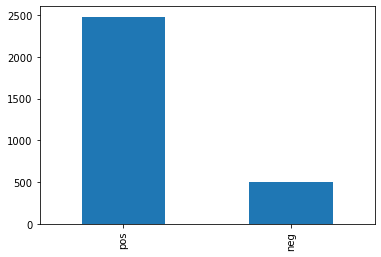

In [20]:
senti['senti'].value_counts().plot.bar()

In [21]:
from sklearn import preprocessing

In [22]:
label_encoder = preprocessing.LabelEncoder()

In [23]:
senti['senti']= label_encoder.fit_transform(df['senti'])

In [24]:
senti['senti'].unique()

array([1, 0])

In [25]:
import re
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    i= re.sub("[\W+""]", " ",i)        
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

In [28]:
senti['reviews']=senti.reviews.apply(cleaning_text)

In [29]:
senti.head(10)

,reviews,ratings,Sentiment,senti
0,dslr giant canon launched entry level dslr act...,2.0,0.8803,1
1,good camera beginner,5.0,0.4404,1
2,great camera perfect product young budding pho...,5.0,0.8934,1
3,really impressed amazon surprise delivering wi...,5.0,0.9801,1
4,product canon local service center help even p...,1.0,0.4215,1
5,request replacement camera main body blackspot...,1.0,0.3182,1
6,received product dslr cannon october adopter g...,2.0,-0.3612,0
7,auto focus perfectminimum aperture dont expect...,3.0,-0.1280,0
8,want upgrade camera point shoot dslr good came...,4.0,-0.6124,0
9,really fully content product reached within ev...,5.0,-0.4863,0


In [31]:
split = senti[['reviews', 'senti']]
train = split.sample(frac=0.8,random_state = 200)
test = split.drop(train.index)

In [32]:
train.shape

(2384, 2)

In [33]:
test.shape

(596, 2)

In [34]:
trainX=train.reviews
trainy=train.senti
testX=test.reviews
testy=test.senti

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
stopwords = set(STOPWORDS)
stopwords.remove("not")

In [38]:
count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

In [39]:
X_train_counts = count_vect.fit_transform(train["reviews"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [40]:
X_new_counts = count_vect.transform(test["reviews"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [42]:
##3 logistic regression
from sklearn.linear_model import LogisticRegression

In [43]:
model=LogisticRegression()
model.fit(X_train_tfidf,trainy)

LogisticRegression()

In [44]:
y_pred=model.predict(X_test_tfidf)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [46]:
print(accuracy_score(testy,y_pred))
print(classification_report(testy,y_pred))
print(confusion_matrix(testy,y_pred))
print(cohen_kappa_score(testy,y_pred))

0.8573825503355704
              precision    recall  f1-score   support

           0       0.89      0.23      0.36       106
           1       0.86      0.99      0.92       490

    accuracy                           0.86       596
   macro avg       0.87      0.61      0.64       596
weighted avg       0.86      0.86      0.82       596

[[ 24  82]
 [  3 487]]
0.3111606657239204


In [95]:
import collections
from sklearn.feature_extraction.text import CountVectorizer 

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
sm=SMOTE(random_state=444)

In [50]:
X_train_res, y_train_res = sm.fit_resample(X_train_tfidf, trainy)

In [51]:
### logistic regression after smote

In [52]:
model2=LogisticRegression()
model2.fit(X_train_res,y_train_res)

LogisticRegression()

In [53]:
y_pred2=model2.predict(X_test_tfidf)

In [55]:
print(accuracy_score(testy,y_pred2))
print(classification_report(testy,y_pred2))
print(confusion_matrix(testy,y_pred2))
print(cohen_kappa_score(testy,y_pred2))

0.8976510067114094
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       106
           1       0.97      0.91      0.94       490

    accuracy                           0.90       596
   macro avg       0.82      0.88      0.84       596
weighted avg       0.91      0.90      0.90       596

[[ 90  16]
 [ 45 445]]
0.6839048480211449


In [56]:
### Multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB

In [57]:
model3=MultinomialNB()
model3.fit(X_train_tfidf,trainy)

MultinomialNB()

In [58]:
y_pred3=model3.predict(X_test_tfidf)

In [59]:
print(accuracy_score(testy,y_pred3))
print(classification_report(testy,y_pred3))
print(confusion_matrix(testy,y_pred3))
print(cohen_kappa_score(testy,y_pred3))

0.8389261744966443
              precision    recall  f1-score   support

           0       0.86      0.11      0.20       106
           1       0.84      1.00      0.91       490

    accuracy                           0.84       596
   macro avg       0.85      0.55      0.56       596
weighted avg       0.84      0.84      0.78       596

[[ 12  94]
 [  2 488]]
0.16536351966390472


In [60]:
##MultinomialNB After SMOTE
model4=MultinomialNB()
model4.fit(X_train_res,y_train_res)

MultinomialNB()

In [61]:
y_pred4=model4.predict(X_test_tfidf)

In [62]:
print(accuracy_score(testy,y_pred4))
print(classification_report(testy,y_pred4))
print(confusion_matrix(testy,y_pred4))
print(cohen_kappa_score(testy,y_pred4))

0.8489932885906041
              precision    recall  f1-score   support

           0       0.56      0.68      0.62       106
           1       0.93      0.89      0.91       490

    accuracy                           0.85       596
   macro avg       0.74      0.78      0.76       596
weighted avg       0.86      0.85      0.85       596

[[ 72  34]
 [ 56 434]]
0.5224699095506018


In [63]:
## SVM
from sklearn.svm import LinearSVC

In [64]:
model7=LinearSVC()
model7.fit(X_train_tfidf,trainy)

LinearSVC()

In [65]:
y_pred7=model7.predict(X_test_tfidf)

In [66]:
print(accuracy_score(testy,y_pred7))
print(classification_report(testy,y_pred7))
print(confusion_matrix(testy,y_pred7))
print(cohen_kappa_score(testy,y_pred7))

0.9060402684563759
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       106
           1       0.93      0.96      0.94       490

    accuracy                           0.91       596
   macro avg       0.85      0.82      0.83       596
weighted avg       0.90      0.91      0.90       596

[[ 72  34]
 [ 22 468]]
0.6637924087355951


In [67]:
## SVM after smote 
model8=LinearSVC()
model8.fit(X_train_res,y_train_res)

LinearSVC()

In [68]:
y_pred8=model8.predict(X_test_tfidf)

In [69]:
print(accuracy_score(testy,y_pred8))
print(classification_report(testy,y_pred8))
print(confusion_matrix(testy,y_pred8))
print(cohen_kappa_score(testy,y_pred8))

0.9026845637583892
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       106
           1       0.96      0.92      0.94       490

    accuracy                           0.90       596
   macro avg       0.83      0.86      0.84       596
weighted avg       0.91      0.90      0.91       596

[[ 85  21]
 [ 37 453]]
0.6858140042172617


In [70]:
## Neural network
from sklearn.neural_network import MLPClassifier
model11=MLPClassifier(hidden_layer_sizes=(5,5))
model11.fit(X_train_tfidf,trainy)

MLPClassifier(hidden_layer_sizes=(5, 5))

In [71]:
y_pred11=model11.predict(X_test_tfidf)

In [72]:
print(accuracy_score(testy,y_pred11))
print(classification_report(testy,y_pred11))
print(confusion_matrix(testy,y_pred11))
print(cohen_kappa_score(testy,y_pred11))

0.8859060402684564
              precision    recall  f1-score   support

           0       0.73      0.57      0.64       106
           1       0.91      0.96      0.93       490

    accuracy                           0.89       596
   macro avg       0.82      0.76      0.79       596
weighted avg       0.88      0.89      0.88       596

[[ 60  46]
 [ 22 468]]
0.5718752640919462


In [73]:
## neural network after smote
model12=MLPClassifier(hidden_layer_sizes=(5,5))
model12.fit(X_train_res,y_train_res)

MLPClassifier(hidden_layer_sizes=(5, 5))

In [74]:
y_pred12=model12.predict(X_test_tfidf)

In [75]:
print(accuracy_score(testy,y_pred12))
print(classification_report(testy,y_pred12))
print(confusion_matrix(testy,y_pred12))
print(cohen_kappa_score(testy,y_pred12))

0.87751677852349
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       106
           1       0.92      0.93      0.93       490

    accuracy                           0.88       596
   macro avg       0.79      0.79      0.79       596
weighted avg       0.88      0.88      0.88       596

[[ 69  37]
 [ 36 454]]
0.5796166035402335


In [ ]:
## decision tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
model9=DecisionTreeClassifier(criterion='entropy')
model9.fit(X_train_tfidf,trainy)

DecisionTreeClassifier(criterion='entropy')

In [78]:
y_pred9=model9.predict(X_test_tfidf)

In [79]:
print(accuracy_score(testy,y_pred9))
print(classification_report(testy,y_pred9))
print(confusion_matrix(testy,y_pred9))
print(cohen_kappa_score(testy,y_pred9))

0.9177852348993288
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       106
           1       0.96      0.94      0.95       490

    accuracy                           0.92       596
   macro avg       0.85      0.88      0.86       596
weighted avg       0.92      0.92      0.92       596

[[ 87  19]
 [ 30 460]]
0.7298527344039074


In [80]:
## Decision tree after smote 

In [81]:
model10=DecisionTreeClassifier(criterion='entropy')
model10.fit(X_train_res,y_train_res)

DecisionTreeClassifier(criterion='entropy')

In [82]:
y_pred10=model10.predict(X_test_tfidf)

In [83]:
print(accuracy_score(testy,y_pred10))
print(classification_report(testy,y_pred10))
print(confusion_matrix(testy,y_pred10))
print(cohen_kappa_score(testy,y_pred10))

0.924496644295302
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       106
           1       0.97      0.94      0.95       490

    accuracy                           0.92       596
   macro avg       0.86      0.90      0.88       596
weighted avg       0.93      0.92      0.93       596

[[ 91  15]
 [ 30 460]]
0.7553812477198103


In [84]:
### BernoulliNB
from sklearn.naive_bayes import BernoulliNB

In [85]:
model5=BernoulliNB()
model5.fit(X_train_tfidf,trainy)

BernoulliNB()

In [86]:
y_pred5=model5.predict(X_test_tfidf)

In [87]:
print(accuracy_score(testy,y_pred5))
print(classification_report(testy,y_pred5))
print(confusion_matrix(testy,y_pred5))
print(cohen_kappa_score(testy,y_pred5))

0.8221476510067114
              precision    recall  f1-score   support

           0       0.50      0.16      0.24       106
           1       0.84      0.97      0.90       490

    accuracy                           0.82       596
   macro avg       0.67      0.56      0.57       596
weighted avg       0.78      0.82      0.78       596

[[ 17  89]
 [ 17 473]]
0.1712666596704795


In [88]:
### bernouli NB after smote
model6=BernoulliNB()
model6.fit(X_train_res,y_train_res)

BernoulliNB()

In [89]:
y_pred6=model6.predict(X_test_tfidf)

In [90]:
print(accuracy_score(testy,y_pred6))
print(classification_report(testy,y_pred6))
print(confusion_matrix(testy,y_pred6))
print(cohen_kappa_score(testy,y_pred6))

0.8003355704697986
              precision    recall  f1-score   support

           0       0.46      0.78      0.58       106
           1       0.94      0.80      0.87       490

    accuracy                           0.80       596
   macro avg       0.70      0.79      0.73       596
weighted avg       0.86      0.80      0.82       596

[[ 83  23]
 [ 96 394]]
0.4623385287161138
